In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv('wine_data.csv')
df

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
173,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
174,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
175,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [27]:
df = pd.read_csv('wine_data.csv',usecols = [0,1,2])
df.columns = ['Class label','Alcohol','Malic Acid']

In [28]:
df

,Class label,Alcohol,Malic Acid
0,1,13.20,1.78
1,1,13.16,2.36
2,1,14.37,1.95
3,1,13.24,2.59
4,1,14.20,1.76
...,...,...,...
172,3,13.71,5.65
173,3,13.40,3.91
174,3,13.27,4.28
175,3,13.17,2.59


<Axes: xlabel='Alcohol', ylabel='Density'>

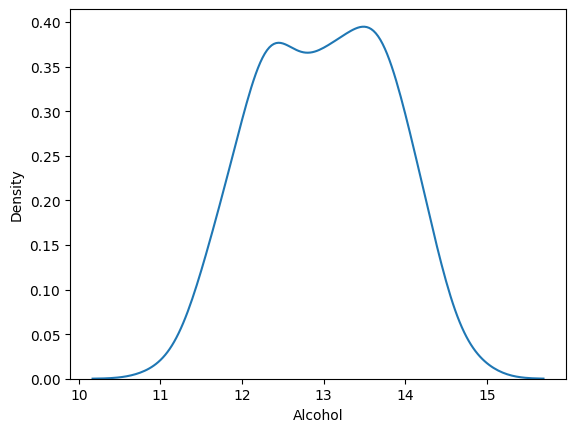

In [29]:
sns.kdeplot(df['Alcohol'])

<Axes: xlabel='Malic Acid', ylabel='Density'>

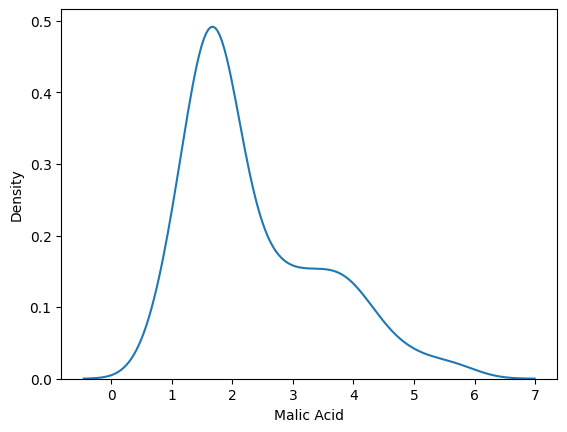

In [30]:
sns.kdeplot(df['Malic Acid'])

<Axes: xlabel='Ash', ylabel='Density'>

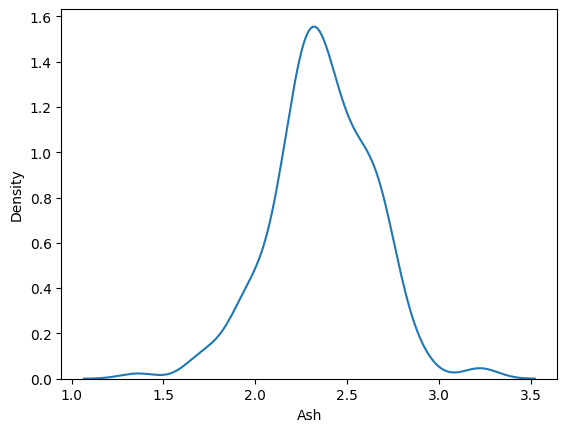

In [22]:
sns.kdeplot(df['Ash'])

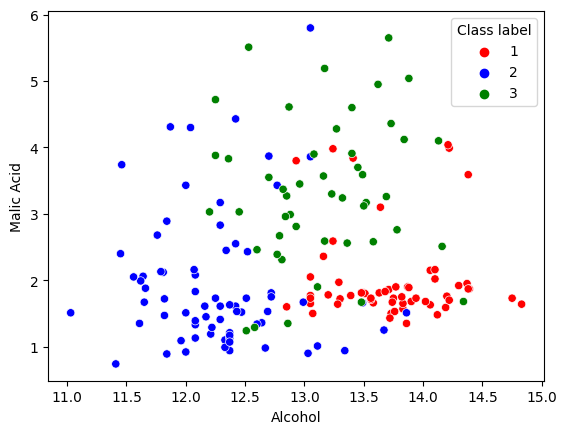

In [33]:
color_dict = {1: 'red', 3: 'green', 2: 'blue'}
sns.scatterplot(x='Alcohol', y='Malic Acid', hue='Class label', palette=color_dict, data=df)
plt.show()

In [34]:
from sklearn.model_selection import train_test_split
X_train , X_test, y_train, y_test = train_test_split(df.drop('Class label',axis = 1),df['Class label'],test_size = 0.3, random_state = 0)
X_train.shape, X_test.shape


((123, 2), (54, 2))

In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [37]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns= X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)

In [38]:
np.round(X_train.describe(), 1)

,Alcohol,Malic Acid
count,123.0,123.0
mean,13.0,2.3
std,0.8,1.2
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.8
75%,13.6,3.1
max,14.8,5.8


Observe that the min amd max value changed to 0 and 1 respectively

In [39]:
np.round(X_train_scaled.describe(), 1)

,Alcohol,Malic Acid
count,123.0,123.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.1
50%,0.5,0.2
75%,0.7,0.4
max,1.0,1.0


So the shape remain same but the distribution got squised in the square region [0,1]

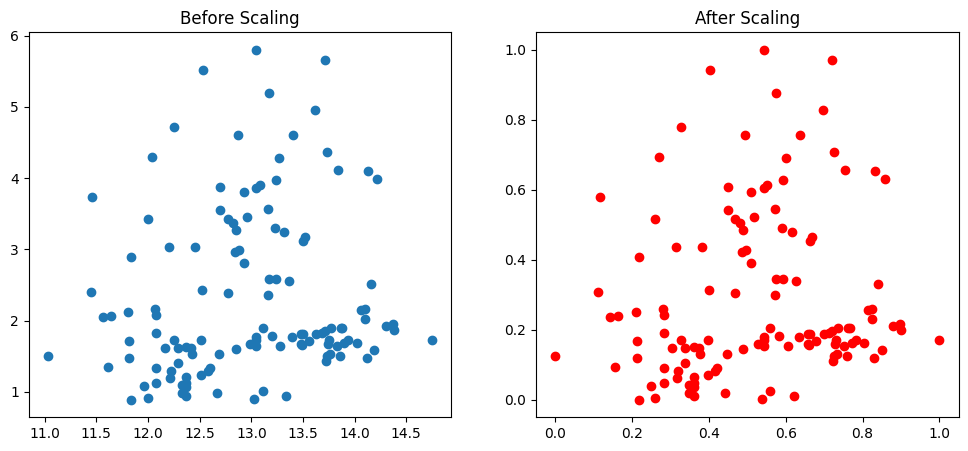

In [40]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (12, 5))

ax1.scatter(X_train['Alcohol'],X_train['Malic Acid'])
ax1.set_title('Before Scaling')
ax2.scatter(X_train_scaled['Alcohol'],X_train_scaled['Malic Acid'],color = 'red')
ax2.set_title('After Scaling')
plt.show()

So we can observe that the kdeplot of both comes under the range of 0 to 1 After Scaling

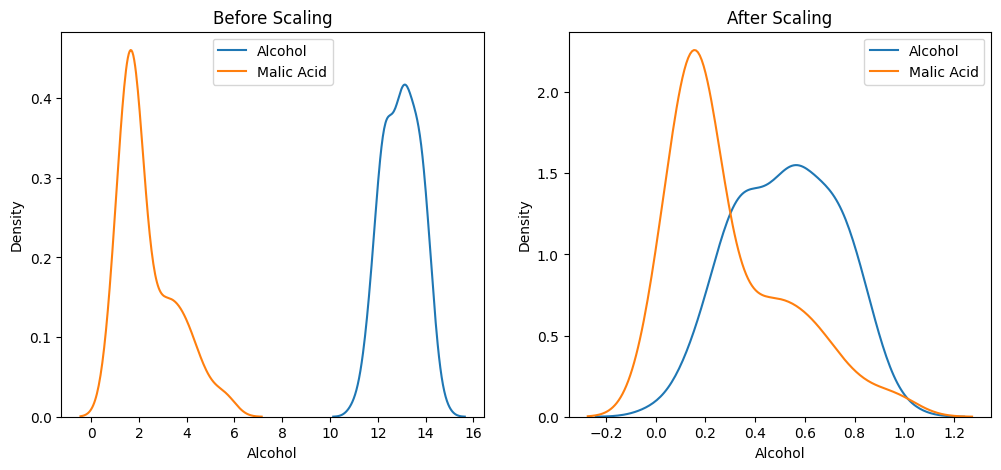

In [42]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# Before Scaling
sns.kdeplot(X_train['Alcohol'], ax=ax1, label='Alcohol')
sns.kdeplot(X_train['Malic Acid'], ax=ax1, label='Malic Acid')

# Set legend for the first subplot
ax1.legend()
ax1.set_title('Before Scaling')

# After Scaling
sns.kdeplot(X_train_scaled['Alcohol'], ax=ax2, label='Alcohol')
sns.kdeplot(X_train_scaled['Malic Acid'], ax=ax2, label='Malic Acid')

# Set legend for the second subplot
ax2.legend()
ax2.set_title('After Scaling')

plt.show()